<a href="https://colab.research.google.com/github/tarunbhaskar100/tarun_github/blob/master/Luxpmsoft_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


# **0. Importing required library and reading the image.**

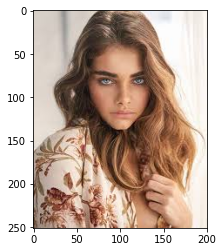

In [73]:
# importing the required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
  
# Save image in set directory
path ="/content/drive/MyDrive/images.jpg"
# Read RGB image
img = cv2.imread(path) 
#convert BGR to RGB image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#check or show image
plt.imshow(img)

# **1. Transform the image in the +x direction by 25%, and create an image**

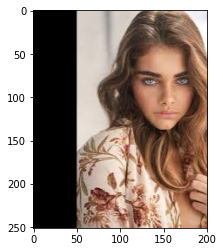

In [76]:
def shift_img_x_dir(img, percentage_shift):
  #Calculating No of pixcels to be shifter
  shift_x=img.shape[1]*percentage_shift
  #Affine Tranformation Matrix for X direction shift
  Matrix = np.float32([[1, 0, shift_x],[0, 1, 0]])
  #Performing Affine trasformation
  shifted_x_img = cv2.warpAffine(img, Matrix, (img.shape[1], img.shape[0]))
  plt.imshow(shifted_x_img)

                         ##Saving the image##
  #shifted_x_img = cv2.cvtColor(shifted_x_img, cv2.COLOR_BGR2RGB)
  #cv2.imwrite('/content/drive/MyDrive/shifted_x_dir.jpg', shifted_x_img)
######################################################################################

shift_img_x_dir(img, 0.25)

# **2. Transform the image in the +y direction by 25%, and create an image**

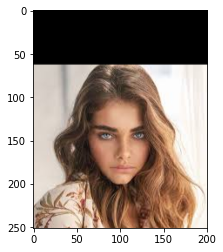

In [78]:
def shift_img_y_dir(img, percentage_shift):
  #Calculating No of pixcels to be shifter
  shift_y=img.shape[0]*percentage_shift
  #Affine Tranformation Matrix for Y direction shift
  Matrix = np.float32([[1, 0, 0],[0, 1, shift_y]])
  #Performing Affine trasformation
  shifted_y_img = cv2.warpAffine(img, Matrix, (img.shape[1], img.shape[0]))
  plt.imshow(shifted_y_img)

                    ##Saving the image##
  #shifted_y_img = cv2.cvtColor(shifted_y_img, cv2.COLOR_BGR2RGB)
  #cv2.imwrite('/content/drive/MyDrive/shifted_y_dir.jpg', shifted_y_img)
####################################################################################

shift_img_y_dir(img, 0.25)

# **3. Rotate the image in Z by 90 degree**

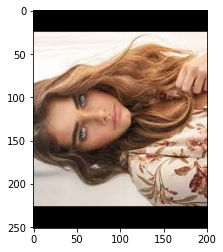

In [79]:
def Rotate_image(img, angle):
  scale=1
  #center of the image
  center=(img.shape[1]//2,img.shape[0]//2)
  #Affine Tranformation Matrix for rotating the image
  Matrix = cv2.getRotationMatrix2D(center, angle ,scale)
  #Performing Affine trasformation
  rotated_img = cv2.warpAffine(img, Matrix, (img.shape[1], img.shape[0]))
  plt.imshow(rotated_img)
                     ##Saving the image##
  #rotate_90_img = cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB)
  #cv2.imwrite('/content/drive/MyDrive/rotate_90_deg.jpg', rotated_img)
####################################################################################
  
Rotate_image(img, 90)

# **4. Rotate the image in Z by -90 degree**

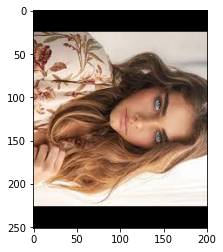

In [80]:
def Rotate_image(img, angle):
  scale=1
  #center of the image
  center=(img.shape[1]//2,img.shape[0]//2)
  #Affine Tranformation Matrix for rotating the image
  Matrix = cv2.getRotationMatrix2D(center, angle ,scale)
  #Performing Affine trasformation
  rotated_img = cv2.warpAffine(img, Matrix, (img.shape[1], img.shape[0]))
  plt.imshow(rotated_img)
                       ##Saving the image##
  #rotate_anti_90_img = cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB)
  #cv2.imwrite('/content/drive/MyDrive/rotate_-90_deg.jpg',rotated_img)
######################################################################################

Rotate_image(img, -90)

# **5. From the center of the image, in all directions, increase the RGB values of the pixels in a manner that, each pixel from the center, the percentage drops by 1%. i.e. the center pixel's RGB will increase by 50%, and the next pixels in x and y directions will be 49%. This goes on and on until the increase becomes 0 %.**


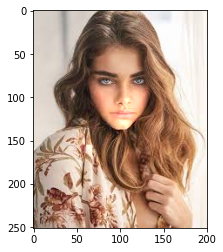

In [82]:
def inc_RGB_val_from_center(image,percentage_inc):
  # X,Y locations of the image center
  cx,cy=image.shape[1]//2,image.shape[0]//2
  for i in range(cy-(percentage_inc-1),cy+percentage_inc):
    for j in range(cx-(percentage_inc-1),cx+percentage_inc):
      for k in range(3):
        if image[i,j,k] > 255/(1+((percentage_inc-max(abs(cx-j),abs(cy-i)))/100)) :
          image[i,j,k] = 255
        else:
          image[i,j,k] = image[i,j,k] * (1+((percentage_inc-max(abs(cx-j),abs(cy-i)))/100))
  plt.imshow(image)

  #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #cv2.imwrite('/content/drive/MyDrive/inc_RGB_values.jpg', image)


inc_RGB_val_from_center(img,50)
